<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [849]:
import pandas as pd
import psycopg2

In [850]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
connection = psycopg2.connect(
    dbname='project_sql',
    user='skillfactory',
    host='84.201.134.129',
    password='cCkxxLVrDE8EbvjueeMedPKt',
    port=5432
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [851]:
# текст запроса
query_3_1 = f'''select 
                count(id)
                from public.vacancies
            '''

In [852]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\1114379196.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [853]:
# текст запроса
query_3_2 = f'''select 
                count(id)
                from public.employers
            '''

In [854]:
# результат запроса
df = pd.read_sql_query(query_3_2, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\3062646138.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [855]:
# текст запроса
query_3_3 = f'''select 
                count(id)
                from public.areas
            '''

In [856]:
# результат запроса
df = pd.read_sql_query(query_3_3, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\928149064.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [857]:
# текст запроса
query_3_4 = f'''select 
                count(id)
                from public.industries
            '''

In [858]:
# результат запроса
df = pd.read_sql_query(query_3_4, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\2101691108.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_4, connection)


,count
0,294


***

In [859]:
# выводы по предварительному анализу данных
# создадим датафрейм для наглядности полученных данных из запросов
conclusions1_df = pd.DataFrame({
    'coun_vacancies': ['49197'],
    'count_employers': ['23501'],
    'count_areas': ['1362'],
    'count_industries': ['294']
})
conclusions1_df.index = ['count_id']
display(conclusions1_df)

,coun_vacancies,count_employers,count_areas,count_industries
count_id,49197,23501,1362,294


Из предварительного анализа данных на данный момент можно сказать, что количество вакансий 49197 в 294 сферах деятельности от 23501 работадателей в 1362 регионах.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [860]:
# текст запроса
query_4_1 = f'''select 
    a.name,
    count(v.id) cnt
from public.areas a
join public.vacancies v on a.id = v.area_id
group by a.name
order by 2 desc
limit 10
'''

In [861]:
# результат запроса
df = pd.read_sql_query(query_4_1, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\2457173557.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_1, connection)


,name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [862]:
# текст запроса
query_4_2 = f'''select 
    count(id)  
from public.vacancies 
where salary_from is not null 
or salary_to is not null
'''

In [863]:
# результат запроса
df = pd.read_sql_query(query_4_2, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\970655580.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_2, connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [864]:
# текст запроса
query_4_3 = f'''select 
    avg (salary_from) as lower_limit,
    avg (salary_to) as apper_limit
from public.vacancies 
'''

In [865]:
# результат запроса
df = pd.read_sql_query(query_4_3, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\2500607024.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_3, connection)


,lower_limit,apper_limit
0,71064.657901,110536.741923


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [866]:
# текст запроса
query_4_4 = f'''select 
    count (id),
    schedule,
    employment
from public.vacancies 
group by schedule, employment
order by 1 desc
'''

In [867]:
# результат запроса
df = pd.read_sql_query(query_4_4, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\2022935265.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_4, connection)


,count,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [868]:
# текст запроса
query_4_5 = f'''select
    experience,
    count (id)
from public.vacancies 
group by experience
order by 2 asc
'''

In [869]:
# результат запроса
df = pd.read_sql_query(query_4_5, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\2316260449.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_4_5, connection)


,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

# выводы по детальному анализу вакансий
Максимальное количество вакансий сосредоточено в столице и городах-миллионниках, что является логичным - численность населения города обусловлена заитересованностью людей проживать в таком городе за счет большего выбора возможностей в разных сферах.\
Из запросов понятно, что верхняя граница з/п 110537, а нижняя - 71065. При этом в таблице о вакансиях информация о з/п (указание хотя бы одной границы) зафиксирована у 24073 вакансий из 49197, т.е. у остальной части информация о з/п не указана.\
Максимальное количество вакансий с полным рабочим днем и полной занятостью; в 4,5 раза меньше - удаленная работа с полной заянтостью; в 22-27 раз меньше относительно максимального количества - гибкий график с полной занятостью и удаленная работа с частичной занятостью; минимальное количество вакансий - 1 вакансия со сменным графиком и проектной работой. Отсюда можно сказать, большинство вакансий нацелены на стабильный классический формат работы, а меньшинство - на особый формат работы, возможно для временной работы или для узконаправленных специалистов.\
Большинство вакансий предполагают опыт работы от 1 до 3 лет, минимальное количество вакансий предполагвет опыт более 6 лет. Это можно объяснить тем, что 1-3 года это достаточный срок для получения опыта во многих сферах, там где опыт требуется более 6 лет скорее это особые вакансии, обусловленные определенными требованиями.



# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [870]:
# текст запроса
query_5_1 = f'''select
    e.name,
    count (v.id)
from public.employers e
join public.vacancies v on v.employer_id = e.id
group by e.name
order by 2 desc
limit 5
'''

In [871]:
# результат запроса
df = pd.read_sql_query(query_5_1, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\3834399874.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


,name,count
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [872]:
# текст запроса
query_5_2 = f'''select
    a.name as areas,
    count (e.id) as count_employers,
    count (v.id) as count_vacancies
from public.areas a
join public.employers e on e.area = a.id
left join public.vacancies v on v.area_id = a.id
where v.id is null
group by a.name
order by 2 desc
'''

In [873]:
# результат запроса
df = pd.read_sql_query(query_5_2, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\2250345976.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_2, connection)


,areas,count_employers,count_vacancies
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
181,Миллерово,1,0
182,"Михайловка (Уфимский район, Башкортостан)",1,0
183,Можайск,1,0
184,Морозовск\n,1,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [874]:
# текст запроса
query_5_3 = f'''select
    e.name as employers,
    count (distinct v.area_id) as count_areas,
    count (distinct v.id) as count_vacancies
from public.employers e
join public.vacancies v on v.employer_id = e.id
group by e.name
order by 2 desc
'''

In [875]:
# результат запроса
df = pd.read_sql_query(query_5_3, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\201667002.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_3, connection)


,employers,count_areas,count_vacancies
0,Яндекс,181,1933
1,Ростелеком,152,491
2,Спецремонт,116,151
3,Поляков Денис Иванович,88,127
4,ООО ЕФИН,71,71
...,...,...,...
14761,UniSol,1,1
14762,UNISTORY LLC,1,3
14763,UNIT6,1,1
14764,United Distribution,1,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [876]:
# текст запроса
query_5_4 = f'''select
    count(distinct e.id) as count_employers
from public.employers e
left join public.employers_industries ei on ei.employer_id = e.id
where ei.industry_id is null
'''

In [877]:
# результат запроса
df = pd.read_sql_query(query_5_4, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\3493105328.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_4, connection)


,count_employers
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [878]:
# текст запроса
query_5_5 = f'''select
    e.name as employers,
    count(ei.industry_id) as count_industry
from public.employers e
left join public.employers_industries ei on ei.employer_id = e.id
group by e.name
having count(ei.industry_id) in (4)
order by 1 asc
offset 2 limit 1
'''

In [879]:
# результат запроса
df = pd.read_sql_query(query_5_5, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\388711819.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_5, connection)


,employers,count_industry
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [880]:
# текст запроса
query_5_6 = f'''select
    count(distinct e.id) as count_employers
from public.employers e
left join public.employers_industries ei on e.id = ei.employer_id 
join public.industries i on i.id = ei.industry_id
where i.name = 'Разработка программного обеспечения'
'''

In [881]:
# результат запроса
df = pd.read_sql_query(query_5_6, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\821628714.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_6, connection)


,count_employers
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [882]:
# код для получения списка городов-милионников
import requests # Импортируем библиотеку requests
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' # Определяем адрес страницы
# Прочитаем таблицу с сайта
tables = pd.read_html(url)
# Создадим датафрейм и выделим столбец городов-миллионников
df0 = pd.DataFrame(tables[0])
display(df0['Город'])
#df1 = pd.DataFrame(tables[1])
#result = pd.concat([df0, df1], axis=0)
#display(result['Город'])

0              Москва
1     Санкт-Петербург
2         Новосибирск
3        Екатеринбург
4              Казань
5          Красноярск
6     Нижний Новгород
7           Челябинск
8                 Уфа
9              Самара
10     Ростов-на-Дону
11          Краснодар
12               Омск
13            Воронеж
14              Пермь
15          Волгоград
Name: Город, dtype: object

In [908]:
query_5_7 = f'''
    select
        a.name as region,
        count(*) as vacancies_count
    from
        public.vacancies as v
        join public.employers as e on v.employer_id = e.id
        join public.areas as a on v.area_id = a.id
    group by
        v.area_id, a.name, e.id, e.name
    having
        a.name in {tuple(df0['Город'])} and e.name = 'Яндекс'
    

    union all
    

    select
        'Total',
        sum(x.cnt)
    from
        (
        select
            count(*) as cnt
        from
            public.vacancies as v
            join public.employers as e on v.employer_id = e.id
            join public.areas as a on v.area_id = a.id
        group by
            v.area_id, a.name, e.id, e.name
        having
            a.name in {tuple(df0['Город'])} and e.name = 'Яндекс'
        ) as x
        

    order by 2
    '''

In [884]:
# результат запроса
df = pd.read_sql_query(query_5_7, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\1965596796.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_7, connection)


,region,vacancies_count
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Ростов-на-Дону,25.0
5,Казань,25.0
6,Пермь,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

# выводы по анализу работодателей
Наиболее популярные работодатели из сферы IT и коммуникаций, банковской сферы и сферы энергетики.\
При этом некоторые компании публикуют вакансии в нескольких сферах одновременно, что говорит о масштабе и значимости этих работодателей.\
В наибольшем количестве регионов вакансии публикует компания "Яндекс", что говорит о активном развитиии компании и, соответсвенно, востребованности специалистов в данной сфере. Также данная компания публикует свои вакансии в основном в городах-миллионниках. Подробное соотношение о вакансиях, публикуемых в городах-миллионниках компанией "Яндекс" приведено на круговой диаграмме ниже.


In [885]:
query_5_77 = f'''
    select
        a.name as region,
        count(*) as vacancies_count
    from
        public.vacancies as v
        join public.employers as e on v.employer_id = e.id
        join public.areas as a on v.area_id = a.id
    group by
        v.area_id, a.name, e.id, e.name
    having
        a.name in {tuple(df0['Город'])} and e.name = 'Яндекс'
    order by 2
    '''

In [886]:
# результат запроса
df_fig = pd.read_sql_query(query_5_77, connection)
df_fig

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\2067585650.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_fig = pd.read_sql_query(query_5_77, connection)


,region,vacancies_count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Ростов-на-Дону,25
5,Казань,25
6,Пермь,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


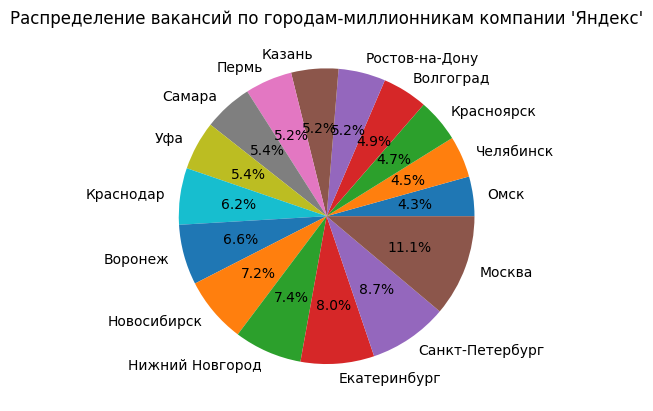

In [887]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

vals = df_fig['vacancies_count']
labels = df_fig['region']

plt.pie(vals, labels=labels, autopct='%1.1f%%')
plt.title("Распределение вакансий по городам-миллионникам компании 'Яндекс'")
plt.show()

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [888]:
# текст запроса
query_6_1 = f'''select
    count(*) 
from public.vacancies 
where name ilike '%data%' or name ilike '%данн%'
'''

In [889]:
# результат запроса
df = pd.read_sql_query(query_6_1, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\366702258.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [890]:
# текст запроса
query_6_2 = f'''select
    count(*) 
from public.vacancies 
where 
(name ilike '%data scientist%' or 
name ilike '%data science%' or
name ilike '%исследователь данных%' or
(name ilike '%ML%' and name not ilike '%HTML%') or
name ilike '%machine learning%' or
name ilike '%машинн%обучен%')
and
(name ilike '%junior%' or
experience = 'Нет опыта' or
employment = 'Стажировка')
'''

In [891]:
# результат запроса
df = pd.read_sql_query(query_6_2, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\2267038862.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [892]:
# текст запроса
query_6_3 = f'''select
    count(*) 
from public.vacancies 
where 
(name ilike '%data scientist%' or 
name ilike '%data science%' or
name ilike '%исследователь данных%' or
(name ilike '%ML%' and name not ilike '%HTML%') or
name ilike '%machine learning%' or
name ilike '%машинн%обучен%')
and
(key_skills ilike '%SQL%' or key_skills ilike '%postgres%')
'''

In [893]:
# результат запроса
df = pd.read_sql_query(query_6_3, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\3794299702.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_3, connection)


,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [894]:
# текст запроса
query_6_4 = f'''select
    count(*) 
from public.vacancies 
where 
(name ilike '%data scientist%' or 
name ilike '%data science%' or
name ilike '%исследователь данных%' or
(name ilike '%ML%' and name not ilike '%HTML%') or
name ilike '%machine learning%' or
name ilike '%машинн%обучен%')
and
(key_skills ilike '%Python%')
'''

In [895]:
# результат запроса
df = pd.read_sql_query(query_6_4, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\4264665179.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_4, connection)


,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [896]:
# текст запроса
query_6_5 = f'''select 
    round(avg(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1), 2) as avg
from public.vacancies v
where 
(name ilike '%data scientist%'or
name ilike '%data science%'or
name ilike '%исследователь данных%'or
(name like '%ML%' and name not ilike '%HTML%') or
name ilike '%machine learning%' or 
name ilike '%машинн%обучен%')
'''

In [897]:
# результат запроса
df = pd.read_sql_query(query_6_5, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\3654210517.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_5, connection)


,avg
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [905]:
# текст запроса
query_6_6 = f'''select 
    experience,
    round(avg(coalesce((salary_from + salary_to)/2, salary_from, salary_to)), 0) as avg
from public.vacancies v
where 
(name ilike '%data scientist%'or
name ilike '%data science%'or
name ilike '%исследователь данных%'or
(name like '%ML%' and name not ilike '%HTML%') or
name ilike '%machine learning%' or 
name ilike '%машинн%обучен%')
and (salary_from is not null or salary_to is not null)
and experience = 'От 3 до 6 лет'
group by experience
'''

In [906]:
# результат запроса
df = pd.read_sql_query(query_6_6, connection)
df

C:\Users\Светлана\AppData\Local\Temp\ipykernel_8976\519194770.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_6_6, connection)


,experience,avg
0,От 3 до 6 лет,243115.0


***

# выводы по предметному анализу
В данном блоке были произведены запросы на предмет понимания количества вакансий, которые имеют отношение к науке о данных.
Из запросов понятно, в реднем, для начинающего DS-специалиста требуется не менее 6 навыков. Из них ключевыми являются владение SQL, postgres 
и наиболее важным - владение Python.

# Общий вывод по проекту

In [907]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

Основные выводы, которые можно сделать в конце данного проекта это то, что максимальное количество вакансий сосредоточены в столице и городах-миллионниках, что обусловленно численностью населения и большим выбором сфер деятельности.\
Заработная плата в среднем находится в границах 70000-100000.\
Также, в основном, предлагаемые вакансии на полный рабочий день с полной занятостью, что может говорить о том, что работадатели готовы обеспечить стабильность для соскателей.\
Большинство вакансий предполагают требования к опыту работы от 1 до 3 лет, т.к. это достаточный срок для получения опыта во многих сферах.\
Наиболее популярные работодатели из сферы IT и коммуникаций, банковской сферы и сферы энергетики, что является логичным, т.к. на данный момент времени это наиболее развивающиеся отрасли. При этом некоторые компании публикуют вакансии в нескольких сферах одновременно, что говорит о масштабе и значимости этих работодателей.\
Отдельно можно провести исследования, какие вакансии требуют опыта работы более 6 лет, т.к. наверняка такой большой опыт работы предполагает высокие требования и ключевые навыки, а также, к каким сферам они относятся, какова заработная плата, какие компании являются работадателями, в каких регионах, возможно больше или меньше их, и всвязи с чем.